# Baseline MLP and CNN

* Baseline MLP and CNN model are used to classify images for both shape and type data.  
* Evaluation metrics used - Accuracy, Loss, Precision, Recall, F1 score, Confusion matrix and AUC-ROC.
* The weight regularization and data augmentation would be used to improve the performance along with increasing the layers and hyperparameter tuning. 

#### Import libraries

In [1]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read from CSV

train_data_shape_encoded = pd.read_csv('processed_data/train_data_shape_encoded.csv')
val_data_shape_encoded = pd.read_csv('processed_data/val_data_shape_encoded.csv')
test_data_shape_encoded = pd.read_csv('processed_data/test_data_shape_encoded.csv')

train_data_type_encoded = pd.read_csv('processed_data/train_data_type_encoded.csv')
val_data_type_encoded = pd.read_csv('processed_data/val_data_type_encoded.csv')
test_data_type_encoded = pd.read_csv('processed_data/test_data_type_encoded.csv')

In [3]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

## Baseline model

In [4]:
def baseline_mlp(train_data, val_data, output_class, labels):

    
        INPUT_DIM = (28,28,1)
        HIDDEN_LAYER_DIM = 400
        OUTPUT_CLASSES = output_class
        
        AUTOTUNE = tf.data.experimental.AUTOTUNE

        model = tf.keras.Sequential([
        
        tf.keras.layers.Flatten(input_shape=INPUT_DIM),
        tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
        tf.keras.layers.Dense(OUTPUT_CLASSES)
        ])
        
        model.summary()
        #tf.keras.utils.plot_model(model, show_shapes=True)
        model.compile(optimizer='SGD',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['categorical_accuracy'])


        train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
        val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')


        batch_size = 28

        train_generator = train_datagen.flow_from_dataframe(
                dataframe=train_data,
                directory='./',
                x_col="Path",
                # y_col=target,
                y_col = train_data.columns[2:].tolist(),
                target_size=(28, 28),
                batch_size=batch_size,
                # class_mode='categorical',
                class_mode='raw',
                color_mode='grayscale')

        validation_generator = val_datagen.flow_from_dataframe(
                dataframe=val_data,
                directory='./',
                x_col="Path",
                # y_col=target,
                y_col = val_data.columns[2:].tolist(),
                target_size=(28, 28),
                batch_size=batch_size,
                # class_mode='categorical',
                class_mode='raw',
                color_mode='grayscale')
        

        history = model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)


        plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                                history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                                metric_name='Accuracy')
        

       # Get the predictions for the validation set
        y_pred = model.predict(validation_generator)

        # Convert predictions to one-hot encoded format
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Get true labels
        y_true = validation_generator.labels
        y_true_classes = np.argmax(y_true, axis=1)

        # Define the class labels (replace this with your actual class labels if needed)
        class_labels = labels

        # Generate the classification report
        report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)

        from sklearn.metrics import roc_auc_score, confusion_matrix

        # Calculate the AUC-ROC score
        auc_roc_score = roc_auc_score(y_true, y_pred, multi_class='ovr')  

        # Print the AUC-ROC score
        print("AUC-ROC Score:", auc_roc_score)

        # Calculate the confusion matrix
        conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

        # Print the confusion matrix
        print("Confusion Matrix:")
        print(conf_matrix)


        # Print the classification report
        print(report)

2024-05-06 17:31:51.718276: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-06 17:31:51.718362: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-06 17:31:51.718371: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-06 17:31:51.718402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-06 17:31:51.718464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,005 (1.21 MB)

 Trainable params: 316,005 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Found 2219 validated image filenames.
Found 740 validated image filenames.


2024-05-06 17:31:51.980464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


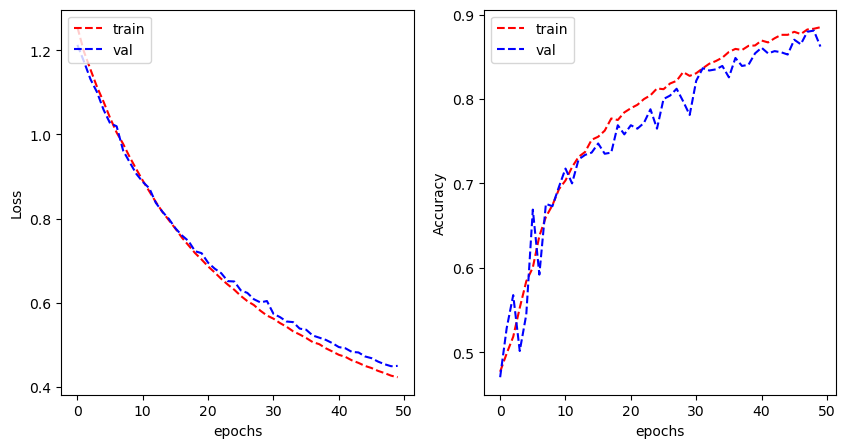

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
AUC-ROC Score: 0.5440792169232309
Confusion Matrix:
[[  3   0  38   8   7]
 [  0   0   1   1   2]
 [ 20   0 185  48  95]
 [  5   0  82  22  37]
 [ 10   0  90  29  57]]
              precision    recall  f1-score   support

     diamond       0.08      0.05      0.06        56
         hex       0.00      0.00      0.00         4
       round       0.47      0.53      0.50       348
      square       0.20      0.15      0.17       146
    triangle       0.29      0.31      0.30       186

    accuracy                           0.36       740
   macro avg       0.21      0.21      0.21       740
weighted avg       0.34      0.36      0.35       740



In [5]:
baseline_mlp(train_data_shape_encoded, val_data_shape_encoded, 5, ['diamond', 'hex', 'round', 'square','triangle'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         6,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,416 (1.22 MB)

 Trainable params: 320,416 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Found 2219 validated image filenames.
Found 740 validated image filenames.


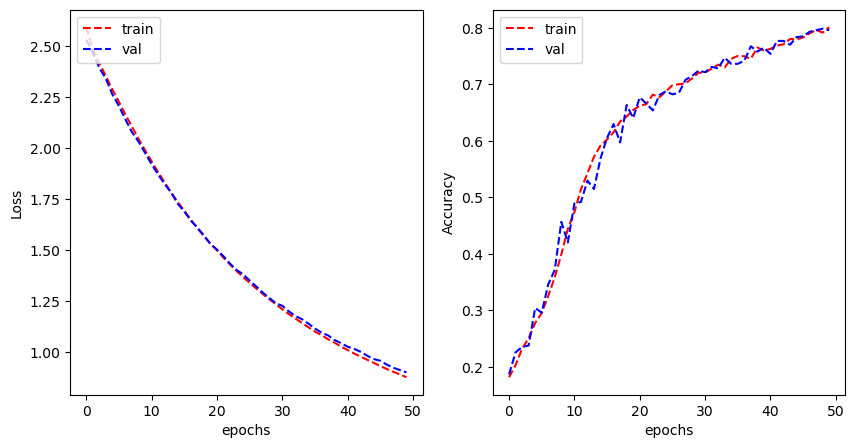

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUC-ROC Score: 0.5113504093212279
Confusion Matrix:
[[ 8  3  1  2  3  2  6  2  4  1  0 12  0  0  2 12]
 [ 6  3  0  5  0  0  4  1  4  2  0  4  0  2  0  9]
 [ 1  1  0  1  1  1  1  2  3  2  2  0  0  0  1  3]
 [ 6  3  1  2  1  2  6  5  1  7  0  8  0  0  0 10]
 [ 1  0  0  2  0  0  1  1  6  1  2  3  0  0  0  5]
 [ 3  1  0  2  1  0  4  0  3  3  1  3  0  1  2  8]
 [ 9  5  0  5  2  1  6  6  6  9  1  4  0  1  0 12]
 [ 4  1  0  1  0  1  5  4  5  5  0  4  0  1  2 12]
 [ 6  4  2  5  2  1  4  3  5  6  1  9  0  0  1 16]
 [ 5  1  0  2  0  5  4  4  3  5  1 10  0  1  0 15]
 [ 6  0  0  2  0  0  2  1  2  2  0  1  0  0  0  6]
 [ 7  5  0  7  1  1  6  6  6  7  0  7  0  4  0 11]
 [ 1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  1]
 [ 3  2  0  3  1  1  4  5  1  3  0  2  0  1  0  5]
 [ 0  1  0  2  0  1  3  2  4  4  1  3  0  0  0  4]
 [11 11  1 14  0  2 10 10  9 12  1 23  0  2  1 27]]
                  precision    recall  f1-score   support

         bicycle       0.10      

In [6]:
baseline_mlp(train_data_type_encoded, val_data_type_encoded, 16, ['bicycle', 'continue', 'crossing',
       'giveway', 'laneend', 'limitedtraffic', 'noentry', 'noparking',
       'parking', 'rightofway', 'roundabout', 'speed', 'stop',
       'trafficdirective', 'traveldirection', 'warning'])

## Convolution Neural Network

In [7]:

def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [8]:
def vcg_cnn(OUTPUT_CLASSES, train_data, val_data, labels):

    model_VGG_1 = tf.keras.Sequential([
        #VGG block 1
        tf.keras.layers.Conv2D(28, (1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(28, (1, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        #VGG block 2
        tf.keras.layers.Conv2D(56, (1, 1), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(56, (1, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        #VGG block 3
        tf.keras.layers.Conv2D(112, (1, 1), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(112, (1, 1), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(OUTPUT_CLASSES),
    ])

    model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
    
    train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
    val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')


    batch_size = 28

    train_generator = train_datagen.flow_from_dataframe(
                dataframe=train_data,
                directory='./',
                x_col="Path",
                y_col= train_data.columns[2:].tolist(),
                target_size=(28, 28),
                batch_size=batch_size,
                # class_mode='categorical',
                class_mode='raw',
                color_mode='grayscale')

    validation_generator = val_datagen.flow_from_dataframe(
                dataframe=val_data,
                directory='./',
                x_col="Path",
                y_col = val_data.columns[2:].tolist(),
                target_size=(28, 28),
                batch_size=batch_size,
                # class_mode='categorical',
                class_mode='raw',
                color_mode='grayscale')
    
    history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

    plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')
    
    # Get the predictions for the validation set
    y_pred = model_VGG_1.predict(validation_generator)

    # Convert predictions to one-hot encoded format
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get true labels
    y_true = validation_generator.labels
    y_true_classes = np.argmax(y_true, axis=1)

    # Define the class labels (replace this with your actual class labels if needed)
    class_labels = labels

    # Generate the classification report
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)

    from sklearn.metrics import roc_auc_score, confusion_matrix

    # Calculate the AUC-ROC score
    auc_roc_score = roc_auc_score(y_true, y_pred, multi_class='ovr')  

    # Print the AUC-ROC score
    print("AUC-ROC Score:", auc_roc_score)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)


    # Print the classification report
    print(report)
    


Found 2219 validated image filenames.
Found 740 validated image filenames.


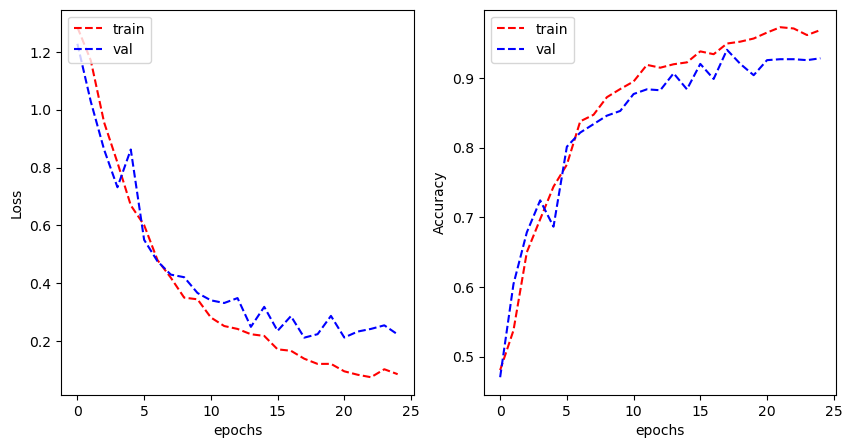

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
AUC-ROC Score: 0.49302895322146434
Confusion Matrix:
[[  2   0  29  17   8]
 [  0   0   3   0   1]
 [ 33   2 176  62  75]
 [ 10   1  61  34  40]
 [ 11   3  91  41  40]]
              precision    recall  f1-score   support

     diamond       0.04      0.04      0.04        56
         hex       0.00      0.00      0.00         4
       round       0.49      0.51      0.50       348
      square       0.22      0.23      0.23       146
    triangle       0.24      0.22      0.23       186

    accuracy                           0.34       740
   macro avg       0.20      0.20      0.20       740
weighted avg       0.34      0.34      0.34       740



In [9]:
vcg_cnn(5, train_data_shape_encoded, val_data_shape_encoded, ['diamond', 'hex', 'round', 'square', 'triangle'])

Found 2219 validated image filenames.
Found 740 validated image filenames.


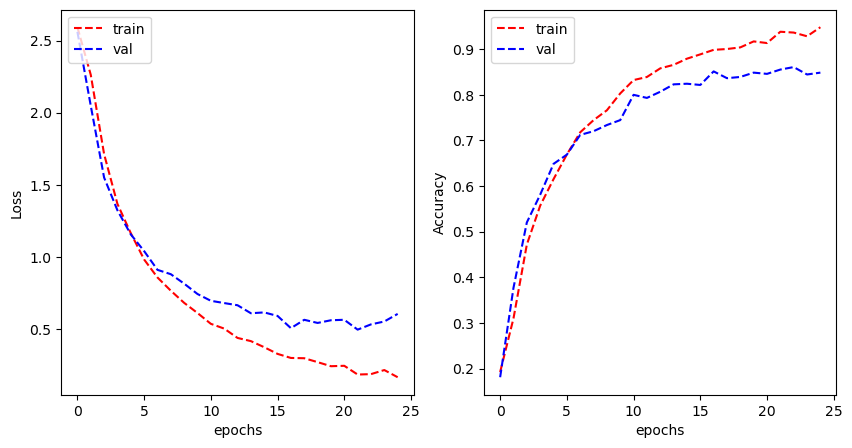

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
AUC-ROC Score: 0.5021518160648228
Confusion Matrix:
[[ 6  6  1  4  3  1  3  4  3  4  0  2  0  4  3 14]
 [ 2  3  2  5  0  0  2  3  4  2  2  2  0  1  1 11]
 [ 0  0  1  1  0  0  2  2  2  3  2  2  0  0  0  4]
 [ 4  2  0  5  3  1  7  0  5  4  2  4  0  3  0 12]
 [ 1  2  0  0  1  1  0  5  1  4  1  4  0  0  0  2]
 [ 2  3  2  3  0  2  2  1  4  2  1  3  0  1  0  6]
 [ 3  5  2  3  2  3  8  4  5  4  4  6  0  3  4 11]
 [ 3  4  0  3  1  3  4  1  7  1  2  2  0  5  1  8]
 [ 3  2  0  3  2  1  7  6  9  8  0  5  1  2  2 14]
 [ 9  1  1  1  2  3  2  4  5  2  2  2  0  7  4 11]
 [ 6  1  0  1  0  1  2  0  1  0  1  2  0  3  0  4]
 [ 4  5  4  4  1  1  5  8  4  6  4  3  1  3  2 13]
 [ 0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  1]
 [ 1  3  1  4  0  1  4  0  4  1  0  4  0  2  0  6]
 [ 4  4  0  1  0  0  0  0  6  1  1  3  0  2  1  2]
 [ 8  5  6 11  3  7 11 11 11  7  4  5  0 11  4 30]]
                  precision    recall  f1-score   support

         bicycle       0.11      

In [10]:
vcg_cnn(16, train_data_type_encoded, val_data_type_encoded, ['bicycle', 'continue', 'crossing',
       'giveway', 'laneend', 'limitedtraffic', 'noentry', 'noparking',
       'parking', 'rightofway', 'roundabout', 'speed', 'stop',
       'trafficdirective', 'traveldirection', 'warning'])